In [65]:
import numpy as np
import scipy as sc
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

import os 
from os import getcwd,listdir
from os.path import abspath,dirname
import sys


import tensorflow as tf
import keras as kr



from neurokit2.ecg import ecg_findpeaks


home_path = "C:\\sebin\\lab\\ecg"
git_path = home_path+"\\ecg_data_wfdb"


sys.path.append(git_path+"//use")

from use.segment.open import ecgtodf
from use.tensor.input import x_tensor_input,y_tensor_input
from sklearn.preprocessing import MinMaxScaler

In [52]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [2]:
def to_mixmax_tensor(x):
    
    record = x.to_numpy() 
    t_record = record.T

    scaler = MinMaxScaler()
    scaler.fit(t_record)

    after_record = scaler.transform(t_record).T


    record = pd.DataFrame(after_record)
    x=x_tensor_input(record)


    return x

# 0.in/out root
-----

In [3]:
xml_folder = "C:/sebin/lab/ecg/data/PhilipsArchiveInternal"
csv_folder = "C:/sebin/lab/ecg/data/philips_to_csv"

# 1. function
## 01. xml
----

In [4]:
from xml.etree.ElementTree import parse

In [5]:
def ecg_xml_date(folder,name):
    path = folder + "/" + name

    ecg_xml = parse(path)
    parent = ecg_xml.getroot()

    child = parent.find("{http://www3.medical.philips.com}internalmeasurements")

    date = child.attrib['date']
    time = child.attrib['time']

    value = date+" "+time
    return value


In [6]:
def ecg_time_find(xml_folder,csv_folder,time):
    for name in listdir(xml_folder):
        if ecg_xml_date(xml_folder,name)==time:
            print(time)
            print(name)

            original_name = name.split(".xml")[0]
            ecg = pd.read_csv(csv_folder+"/"+original_name+".csv")
            ecg = ecg.to_numpy()

            return original_name,ecg
    return -1

## 02.preprocessing
------------------------------------------

In [33]:
def ecg_flatten(ecg):
    ecg = ecg [0:5000].ravel()
    ecg = sc.signal.resample(ecg,3600)
    ecg = ecg.ravel()
    return ecg

In [38]:
def make_segment(ecg):
    seg = [] 
    peaks = ecg_findpeaks(ecg,sampling_rate = 360)['ECG_R_Peaks']

    for p in peaks:
        start = p-144
        end = p+144

        print(start,end)

        if (start < 0 or end >5000) :
            print(1)
            continue
        else:
            seg.append(pd.DataFrame(ecg[start:end]))
    return seg


In [62]:
def predict(one_segment):
    p = pd.DataFrame(seg[6])
    test_data = to_mixmax_tensor(p.T)

    plt.subplot(2,1,1)
    
    plt.plot(test_data[0])


    predict = model.predict(test_data)
    plt.subplot(2,1,2)
    plt.xlabel("beat")
    plt.ylabel("correlation")

    plt.plot(label,predict[0])



## 03.model
------------------------

In [43]:
model = kr.models.load_model(git_path+"\\test\\02\\07\\model02.h5")


## 04.other
----------------------

In [42]:
number = [0,1,2,3,4]
label = ['N','S','V','F','Q']

--------------------------

# 01번째 
file:///C:/sebin/lab/ecg/data_annotation/philips/abnormal/EK_140588989[20210917095816]___[]210917116.pdf
----------------------

In [7]:
time = "2021-09-17 09:58:16"

-------------------------------------------------

In [28]:
name,ecg = ecg_time_find(xml_folder,csv_folder,time)

2021-09-17 09:58:16
2c0cd400-1753-11ec-4823-0068ebca0029.xml


In [36]:
re_ecg = ecg_flatten(ecg)

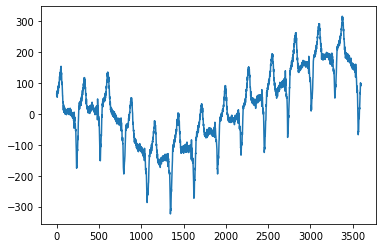

In [37]:
plt.plot(re_ecg)

In [39]:
seg = make_segment(re_ecg)

101 389
358 646
632 920
934 1222
1186 1474
1463 1751
1762 2050
2296 2584
2573 2861
2854 3142
3150 3438
3406 3694


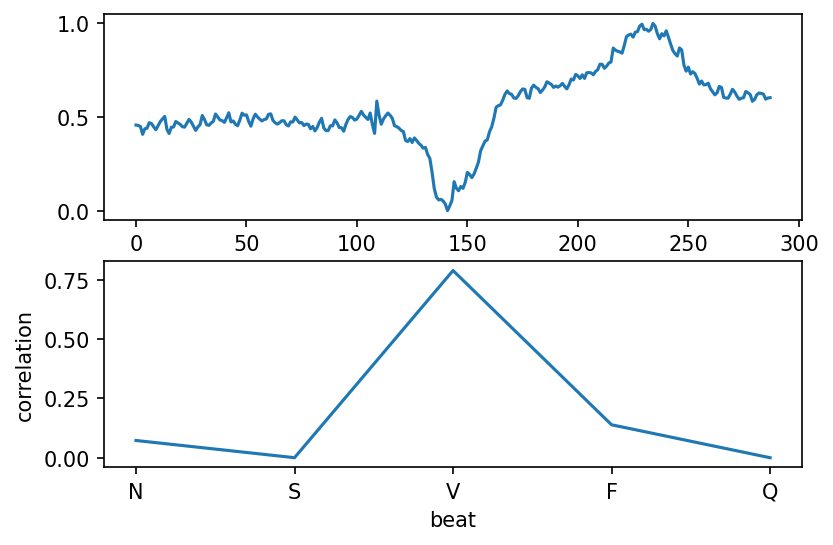

In [63]:
predict(seg[6])